# Logistic Regression

### Sigmoid Function:
 
S-Förmige Funktion

definiert als:

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

Asymptoten bei: $y = 0$ und $y = 1$. Mittelwert: $x = 0$

Die Funktion wird in der Logistischen Regression verwendet, um die Wahrscheinlichkeit zu berechnen, dass eine Variable einer bestimmten Klasse zugeordnet wird. 

Die Funktion nimmt eine beliebige Zahl und gibt eine Wahrscheinlichkeit zwischen 0 und 1 zurück.

Continuous Data und Discrete Data kann in der Logistischen Regression verwendet werden.



#### Sigmoid function für Logistic Regression

$$
p(x)={\frac {1}{1+e^{\frac{-(x-\mu)}{s}}}}
$$

$\mu$ ist der Mittelwert

y-Achse: Wahrscheinlichkeit

x-Achse: Werte

### Logistische Regression
- Klassifikationsalgorithmus
- Predicted die Wahrscheinlichkeit, dass eine Instanz zu einer bestimmten Klasse gehört
- Wenn die Wahrscheinlichkeit größer als 50% ist, wird die Instanz der Klasse 1 zugeordnet, sonst der Klasse 0

Die Werte werden mit der Logit Funktion in die Wahrscheinlichkeit umgewandelt.

$$
\ln{\frac{p}{1-p}}
$$

Dabei ist p die Wahrscheinlichkeit, dass die Instanz der Klasse 1 zugeordnet wird.

Der Mittelpunkt der y-Achse ist p = 0.5

$$
\ln{\frac{0.5}{1-0.5}} = 0
$$

Dies ist nun der Mittelpunkt der x-Achse

Problem:
- Wenn die Wahrscheinlichkeiten 1 oder 0 sind:
    - $\ln{\frac{1}{1-1}} = \ln{\frac{1}{0}} = \ln{1} - \ln{0} = 1 - (-\infty) = \infty$
    - $\ln{\frac{0}{1-0}} = \ln{\frac{0}{1}} = \ln{0} - \ln{1} = -\infty - 0 = -\infty$


### Decision Boundary
- Trennlinie, die die Klassen voneinander trennt
- Die Wahrscheinlichkeit wird durch die Sigmoid Funktion berechnet
- Die Decision Boundary ist der Punkt, an dem die Wahrscheinlichkeit 50% beträgt
- binärer Classifier



$$ y = k * x + d $$

$$ = $$

$$y = x * \text{Coefficient} + \text{y-Achse Intercept} $$

### Logistic Regression Beispiel

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

**Testdaten**

In [27]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

**Model**

In [28]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

**Prediction mit Wahrscheinlichkeiten**

In [29]:
model.predict_proba(x)

array([[0.70498277, 0.29501723],
       [0.63347563, 0.36652437],
       [0.55556294, 0.44443706],
       [0.47481893, 0.52518107],
       [0.39537049, 0.60462951],
       [0.32108813, 0.67891187],
       [0.2548788 , 0.7451212 ],
       [0.19833365, 0.80166635],
       [0.15177782, 0.84822218],
       [0.11458821, 0.88541179]])

In [30]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

**Visualisierung**

- Rot: Sigmoid Function
- Blau: Decision Boundary

Die Decision Boundary ist der Punkt, an dem die Wahrscheinlichkeit 50% beträgt

y = Wahrscheinlichkeit
x = Werte

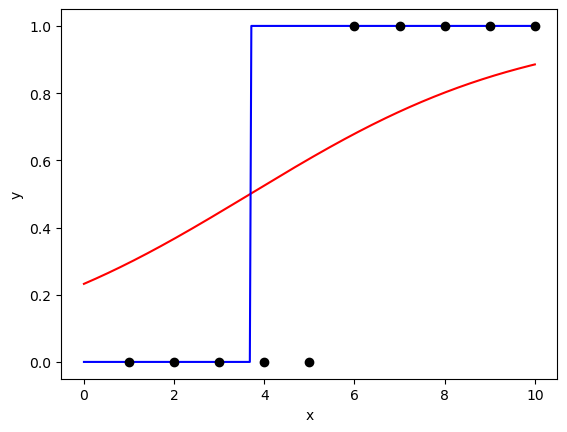

In [31]:
plt.scatter(x.ravel(), y, color='black', zorder=20)
x_test = np.linspace(0, 10, 300)
y_prob = model.predict_proba(x_test.reshape(-1, 1))[:, 1]
plt.plot(x_test, y_prob, color='red')

plt.plot(x_test, y_prob > 0.5, color='blue')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

**Decision Boundary**

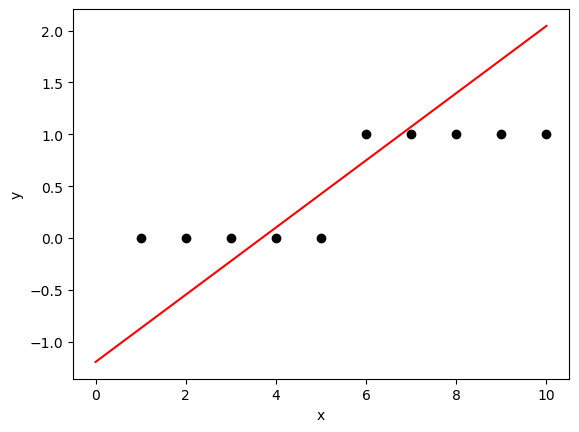

In [32]:
plt.scatter(x.ravel(), y, color='black', zorder=20)
x_test = np.linspace(0, 10, 300)
y_prob = model.predict_proba(x_test.reshape(-1, 1))[:, 1]
plt.plot(x_test, np.log(y_prob/(1-y_prob)), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Coefficient und Intercept**

- **Coefficient:** Steigung der Decision Boundary
                    d.h für jeden Anstieg um 1, steigt die Wahrscheinlichkeit um den Coefficient
- **Intercept:** Punkt, an dem die Decision Boundary die y-Achse schneidet
        d.h. wenn x = 0, dann ist die Wahrscheinlichkeit gleich dem Intercept

In [33]:
model.coef_

array([[0.32398305]])

In [34]:
model.intercept_

array([-1.19512263])

In [35]:
model.predict([[7.5]])

array([1])

#### Linear Regression vs Logistic Regression
- fitting:
	- **linear regression: "least squares":**
	    die Summe der quadrierten Abweichungen der Vorhersagen von den tatsächlichen Werten wird minimiert
	- **logistic regression: "maximum likelihood":**
	    die Wahrscheinlichket dass die meisten Datenpunkte beobachtet werden wird maximiert

#### Maximum likelihood:
- Die Wahrscheinlichkeit, dass die datei beobachtet werden

$$
p = \frac{e^{ln(odds)}}{1 + e^{ln(odds)}}
$$

Daten werden auf Wahrscheinlichkeiten umgerechnet (Umkehrung der Logit Funktion)

Die Likelihood eines Datenpunktes ist der Wahrscheinlichkeitswert auf der X-Achse bei diesem Datenpunkt

Das $R^2$ wird in der Logistic Regression folgendermaßen berechnet:

Daten werden auf die beste gefittete Linie gelegt und die Likelihood wird berechnet

Die Daten werden mit den Ln(odds) auf Wahrscheinlichkeiten umgerechnet

Die Likelihood wird berechnet 

LL = Log Likelihood (ln(odds))

LL(overall p) = wenn die Daten auf die Linie gelegt werden

LL(fit) = wenn die Daten auf die beste gefittete Signoid Function gelegt werden

$$
R^2 = \frac{LL(\text{overall p} - LL(\text{fit})}{LL(\text{overall p})}
$$



## [Interactive Logistic Regression Graph](https://www.desmos.com/calculator/5vsoxlmehx)
Hier wird die Logistic Regression mit dem Fitting durch Maximum Likelihood gezeigt

**Beispiel für R^2**

In [36]:
from sklearn.metrics import r2_score

y_pred = model.predict(x)
r2_score(y, y_pred)

0.19999999999999996

### t-test (in der Statistik)

Zwei Gruppen werden miteinander verglichen

Zwei Linien werden auf die Daten gefittet und dann Verglichen

Es wird jeweils der Mittelwert der Zwei Gruppen verglichen

Coefficient:
$$
y = \text{Mittelwert Gruppe 1} * b_1 + (\text{Mittelwert Gruppe 2} - \text{Mittelwert Gruppe 1}) * b_2
$$

### t-test in Logistic Regression

$$
y = \ln{\text{P(Gruppe 1)}} * b_1 + (\ln{\text{P(Gruppe 2)}} - \ln{\text{P(Gruppe 1)}}) * b_2
$$

kann umgeformt werden zu:
$$
y = \ln{\text{P(Gruppe 1)} * b_1 + (\ln{\frac{\text{P(Gruppe 2)}}{\text{P(Gruppe 2)}}}) * b_2
$$

# T-Test in Logistic Regression Beispiel

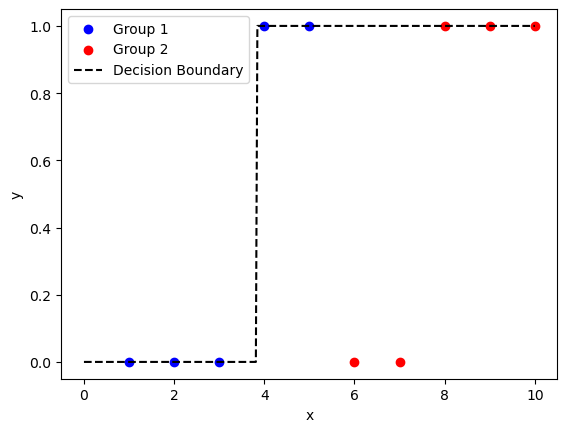

Mean of Group 1 (x): 3.0
Mean of Group 2 (x): 8.0
Mean of Group 1 (y): 0.4
Mean of Group 2 (y): 0.6
Coefficient b1: 0.20649658015443795
Coefficient b2: 0.016745431639257076
Probability of Group 1 at x = 7 : 1.4945479567724487
Probability of Group 2 at x = 7 : 1.5047299988032026


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Group 1
x1 = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y1 = np.array([0, 0, 0, 1, 1])

# Group 2
x2 = np.array([6, 7, 8, 9, 10]).reshape(-1, 1)
y2 = np.array([0, 0, 1, 1, 1])

mean_x1 = np.mean(x1)
mean_x2 = np.mean(x2)
mean_y1 = np.mean(y1)
mean_y2 = np.mean(y2)

x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

plt.scatter(x1, y1, color='blue', label='Group 1')
plt.scatter(x2, y2, color='red', label='Group 2')

x_test = np.linspace(0, 10, 300)
y_prob = model.predict_proba(x_test.reshape(-1, 1))[:, 1]
plt.plot(x_test, y_prob > 0.5, color='black', linestyle='--', label='Decision Boundary')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

print("Mean of Group 1 (x):", mean_x1)
print("Mean of Group 2 (x):", mean_x2)
print("Mean of Group 1 (y):", mean_y1)
print("Mean of Group 2 (y):", mean_y2)

b1 = model.coef_[0][0]
b2 = model.coef_[0][0] * (np.log(mean_y2) - np.log(mean_y1)) / (mean_x2 - mean_x1)
print("Coefficient b1:", b1)
print("Coefficient b2:", b2)

def t_test(x):
    p_group1 = np.exp(b1 * np.log(x))
    p_group2 = np.exp(b1 * np.log(x) + b2 * (np.log(mean_y2) - np.log(mean_y1)))
    return p_group1, p_group2

x_example = 7
p_group1, p_group2 = t_test(x_example)
print("Probability of Group 1 at x =", x_example, ":", p_group1)
print("Probability of Group 2 at x =", x_example, ":", p_group2)


### Multinomial logistic regression
- mehr als 2 Klassen
- mehrere binäre Klassifikatoren
- eine Klasse wird als Referenzklasse verwendet
- die Klasse mit der höchsten Wahrscheinlichkeit wird ausgewählt

### Quellen:
- [https://statquest.org/](https://statquest.org/)
- [https://en.wikipedia.org/wiki/Logistic_regression](https://en.wikipedia.org/wiki/Logistic_regression)
- [https://www.geeksforgeeks.org/understanding-logistic-regression/](https://www.geeksforgeeks.org/understanding-logistic-regression/)